# Compare Flights example

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

## Importing libraries

In [3]:
from rocketpy.plots.compare import CompareFlights
from rocketpy import Environment, Flight, Rocket, SolidMotor
from datetime import datetime, timedelta

## Creating the Flight objects

First, let's create the environment, motor and rocket objects.

In [5]:
after_tomorrow = datetime.now() + timedelta(days=2)
env = Environment(latitude=-23, longitude=-49, date=after_tomorrow)
env.set_atmospheric_model(type="Forecast", file="GFS")

Pro75M1670 =  SolidMotor(
    thrust_source="../../data/motors/Cesaroni_M1670.eng",
    dry_mass=1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    nozzle_radius=33 / 1000,
    grain_number=5,
    grain_density=1815,
    grain_outer_radius=33 / 1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=120 / 1000,
    grain_separation=5 / 1000,
    grains_center_of_mass_position=0.397,
    center_of_dry_mass_position=0.317,
    nozzle_position=0,
    burn_time=3.9,
    throat_radius=11 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

calisto = Rocket(
    radius=127 / 2000,
    mass=14.426,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="../../data/calisto/powerOffDragCurve.csv",
    power_on_drag="../../data/calisto/powerOnDragCurve.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)

calisto.set_rail_buttons(
    upper_button_position=0.0818,
    lower_button_position=-0.618,
    angular_position=45,
)

calisto.add_motor(Pro75M1670, position=-1.255)

nosecone = calisto.add_nose(
    length=0.55829, kind="vonKarman", position=1.278
)

fin_set = calisto.add_trapezoidal_fins(
    n=4,
    root_chord=0.120,
    tip_chord=0.060,
    span=0.110,
    position=-1.04956,
    cant_angle=0.5,
    airfoil=("../../data/calisto/NACA0012-radians.csv","radians"),
)

tail = calisto.add_tail(
    top_radius=0.0635, bottom_radius=0.0435, length=0.060, position=-1.194656
)


def drogue_trigger(p, h, y):
    # p = pressure considering parachute noise signal
    # h = height above ground level considering parachute noise signal
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]

    # activate drogue when vz < 0 m/s.
    return True if y[5] < 0 else False


def main_trigger(p, h, y):
    # p = pressure considering parachute noise signal
    # h = height above ground level considering parachute noise signal
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]

    # activate main when vz < 0 m/s and z < 800 m
    return True if y[5] < 0 and h < 800 else False


Main = calisto.add_parachute(
    "Main",
    cd_s=10.0,
    trigger=main_trigger,
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Drogue = calisto.add_parachute(
    "Drogue",
    cd_s=1.0,
    trigger=drogue_trigger,
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Now we can create different flights varying the launch angle and the rail 
inclination:

In [6]:
inclinations = [85, 75, 60]
headings = [90, 135]
flights = []

for heading in headings:
    for inclination in inclinations:
        flight = Flight(
            environment=env,
            rocket=calisto,
            rail_length=5.2,
            inclination=inclination,
            heading=heading,
            name=f"Incl {inclination} Head {heading}",
        )
        flights.append(flight)


In [7]:
print("Number of flights: ", len(flights))

Number of flights:  6


## Start the comparison

In [8]:
comparison = CompareFlights(flights)

### Linear Kinematics

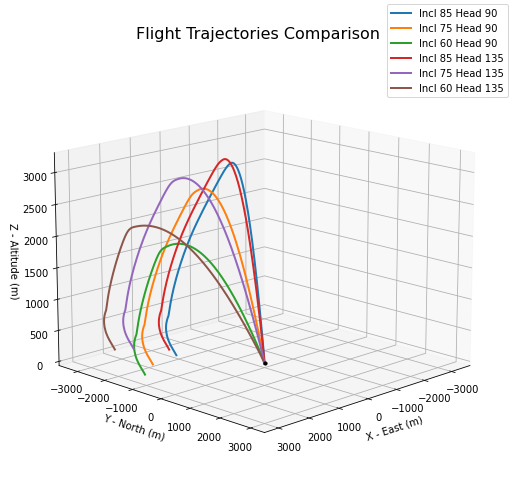

In [9]:
comparison.trajectories_3d(legend=True)

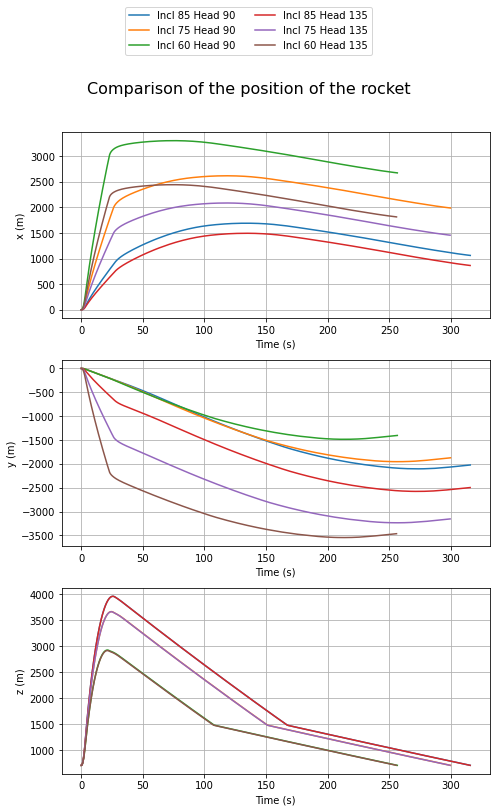

In [12]:
comparison.positions()

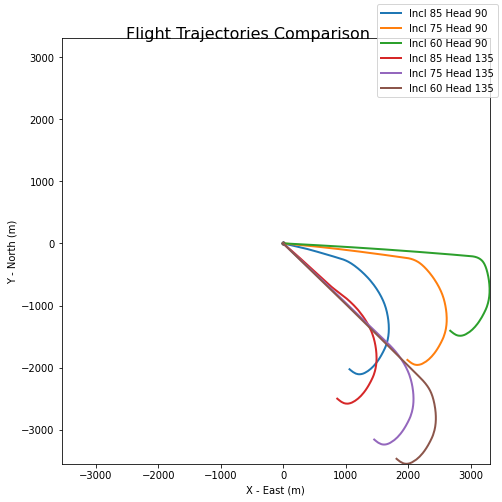

In [13]:
comparison.trajectories_2d(plane="xy", legend=True)

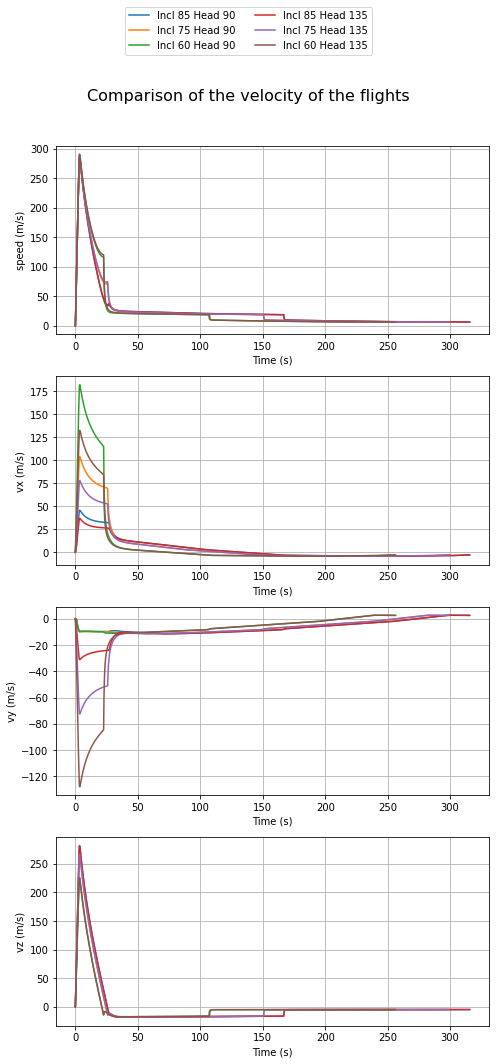

In [14]:
comparison.velocities()

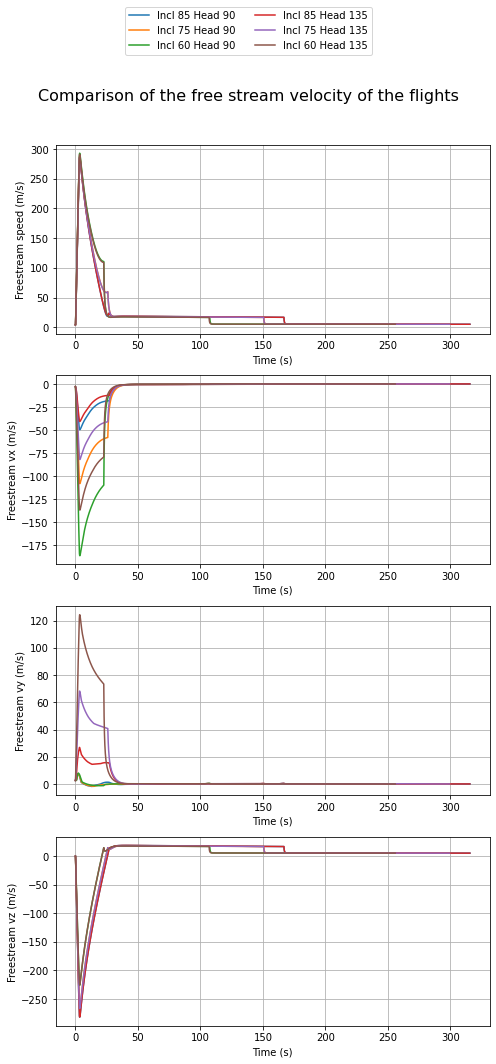

In [15]:
comparison.stream_velocities()

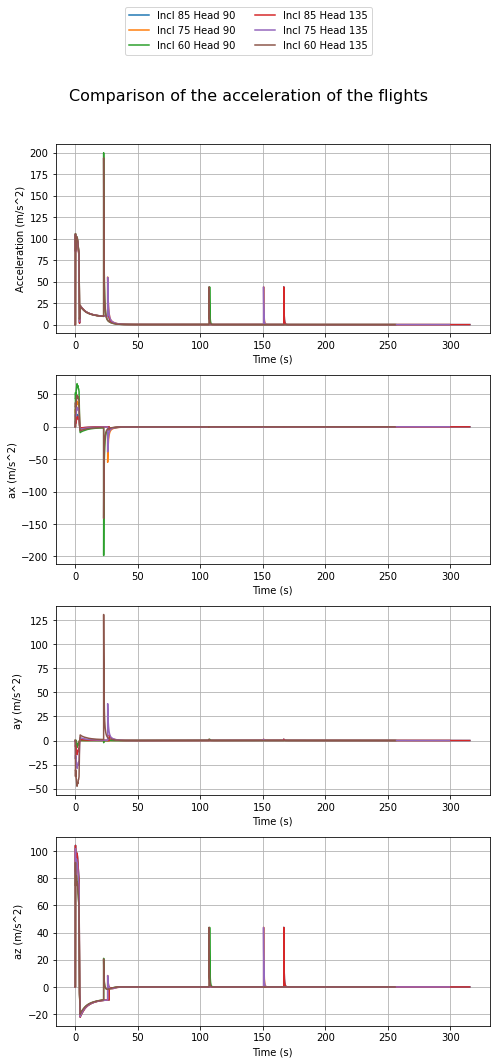

In [16]:
comparison.accelerations()

### Angular kinematics

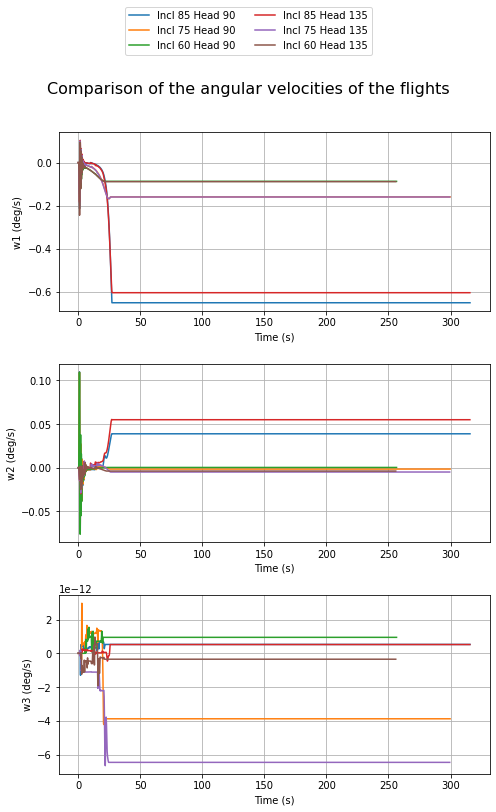

In [17]:
comparison.angular_velocities()

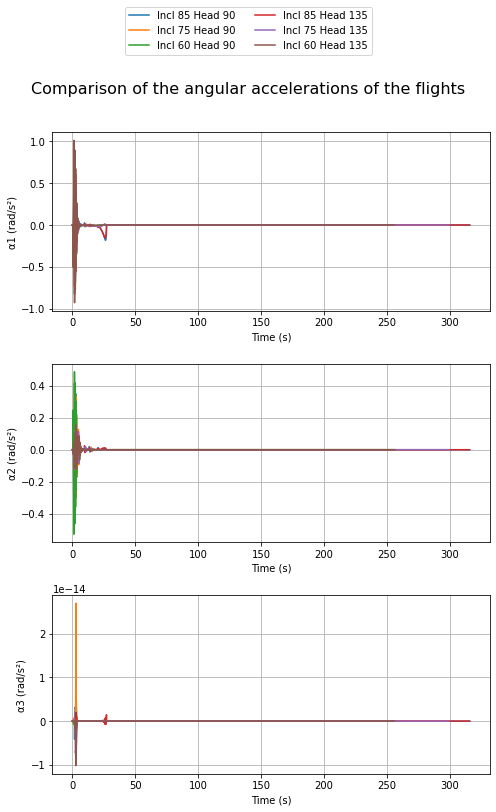

In [18]:
comparison.angular_accelerations()

### Attitudes

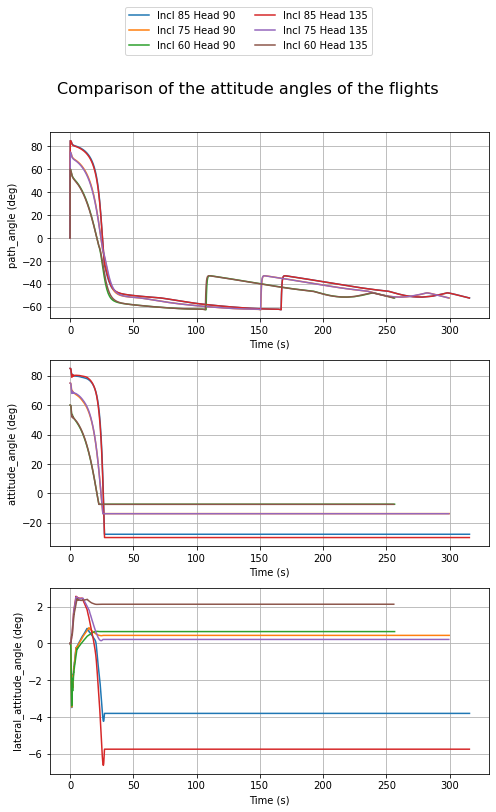

In [19]:
comparison.attitude_angles()

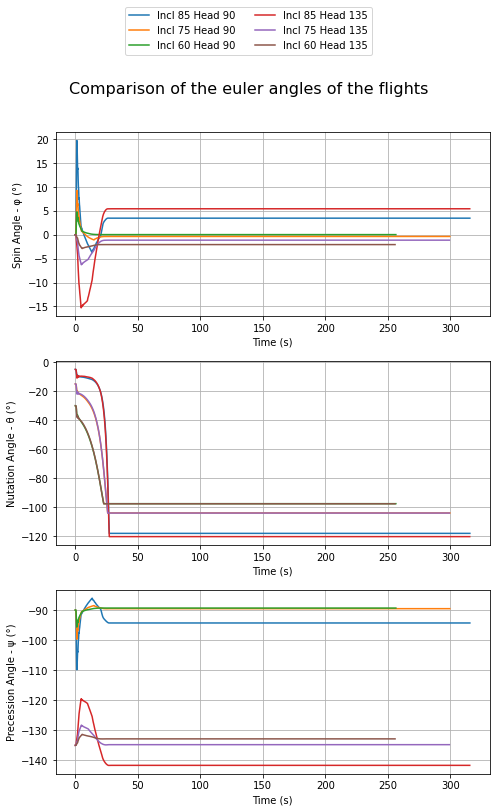

In [20]:
comparison.euler_angles()

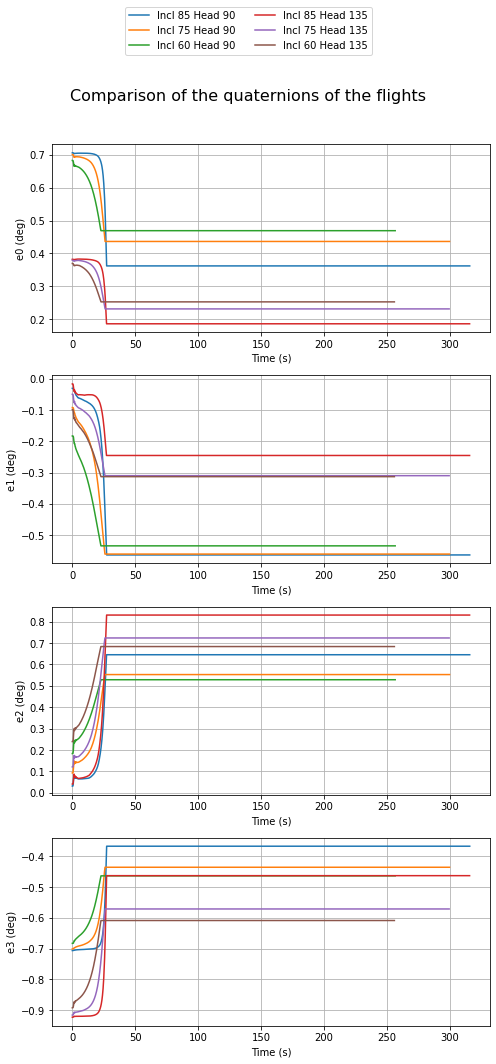

In [21]:
comparison.quaternions()

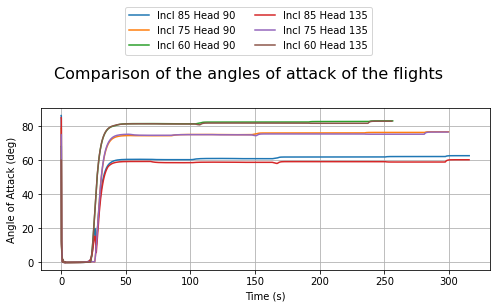

In [22]:
comparison.angles_of_attack()

### Forces and Moments

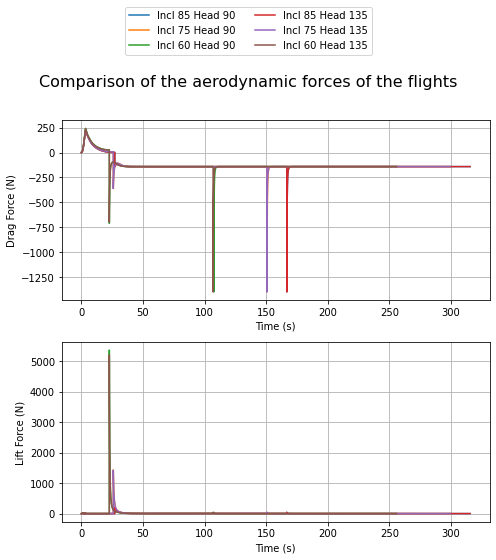

In [37]:
comparison.aerodynamic_forces()

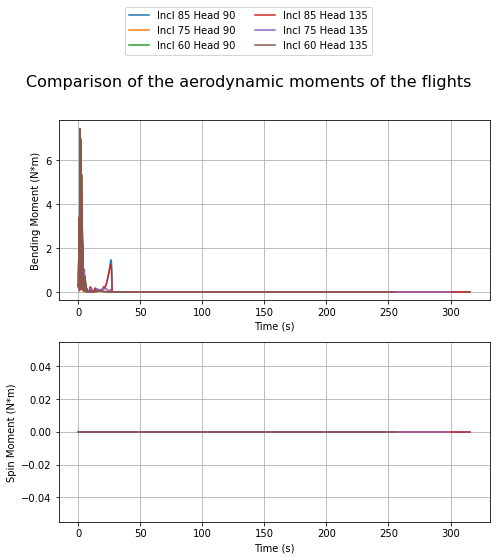

In [24]:
comparison.aerodynamic_moments()

In [25]:
# comparison.rail_buttons_forces() # Currently not working!

### Energies and Power

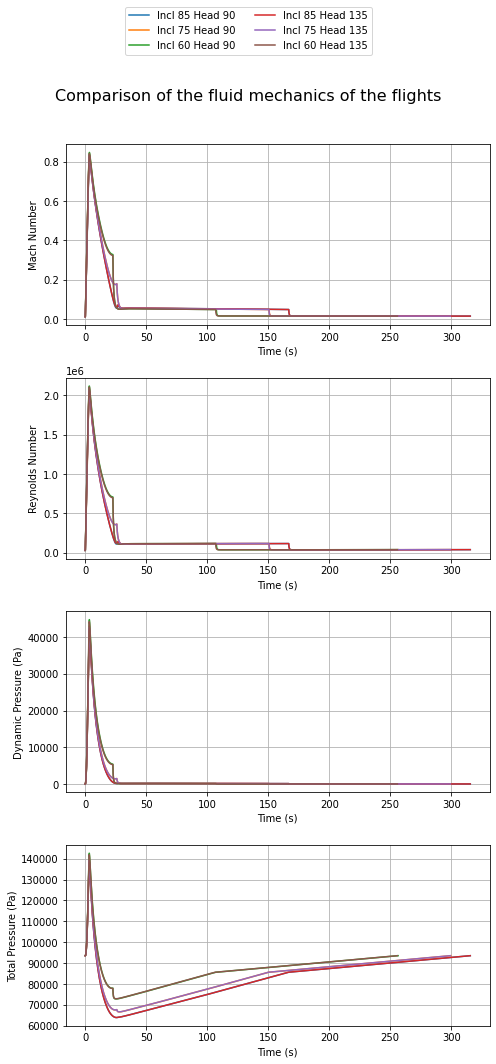

In [26]:
comparison.fluid_mechanics()

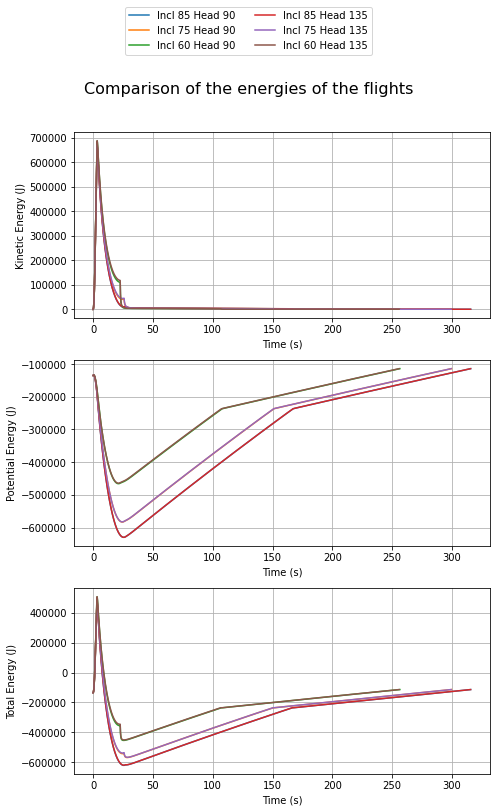

In [27]:
comparison.energies()

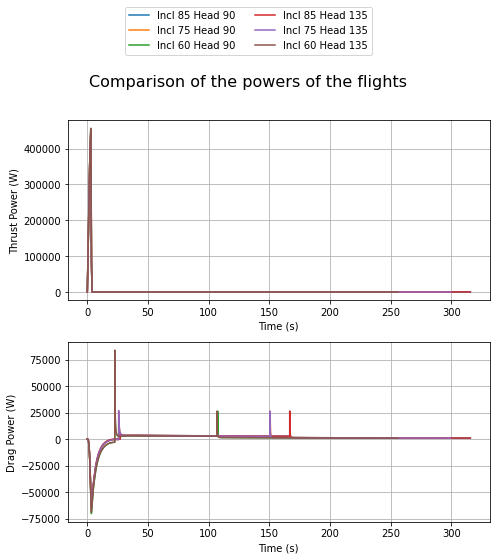

In [28]:
comparison.powers()

## Plotting everything together

Alternatively, we can plot all the results together by calling one simple 
method:

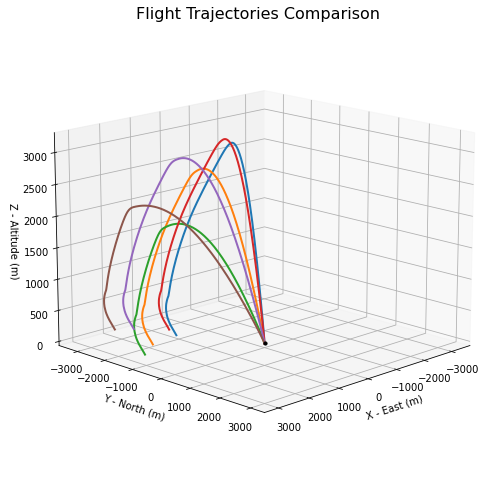

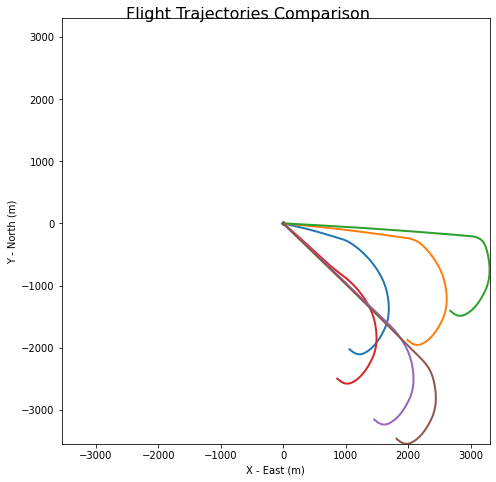

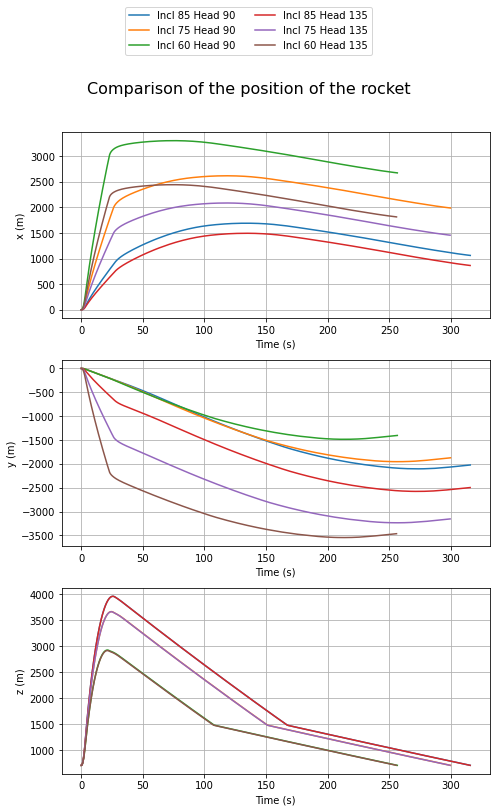

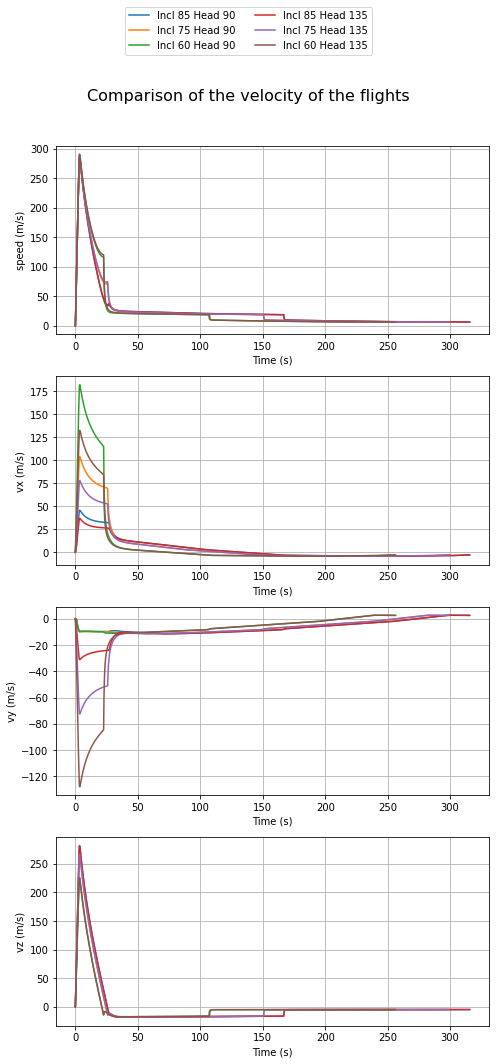

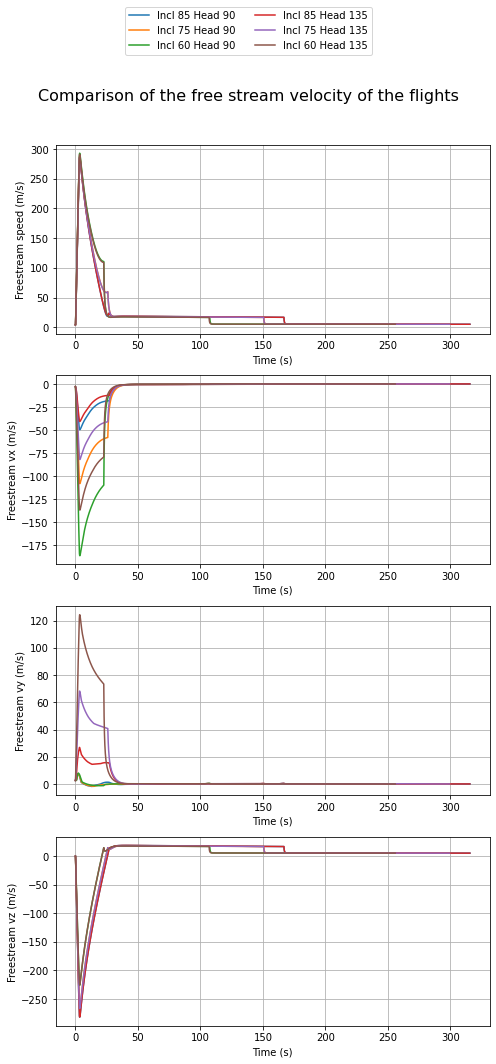

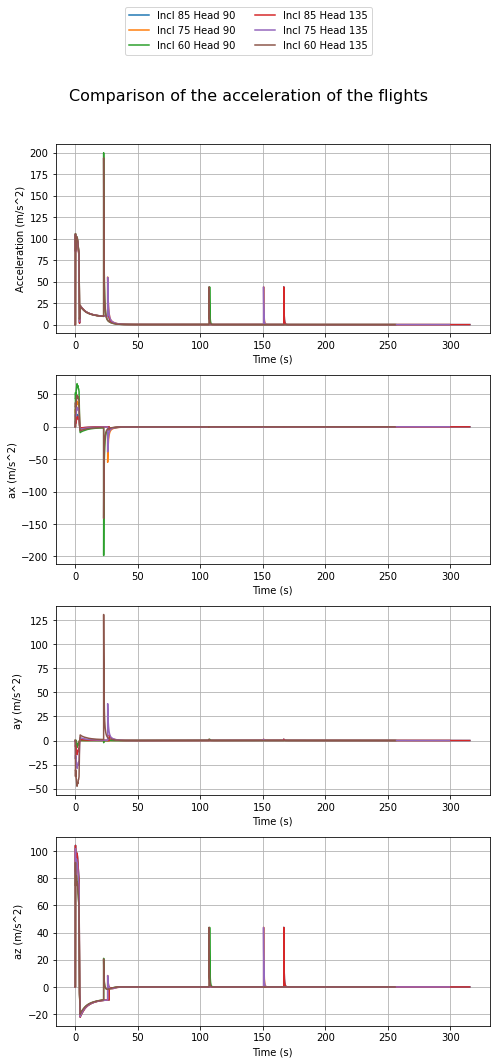

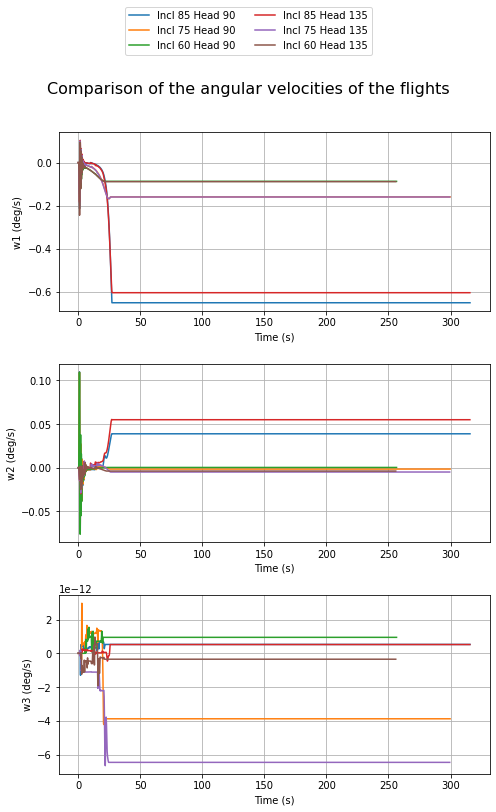

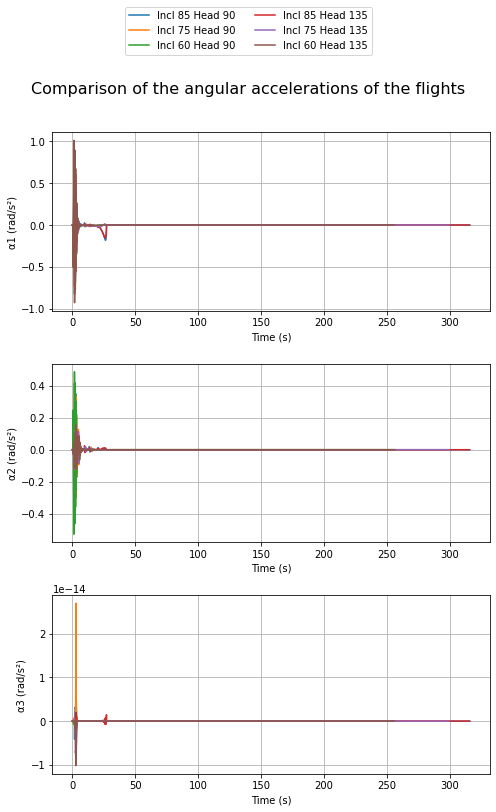

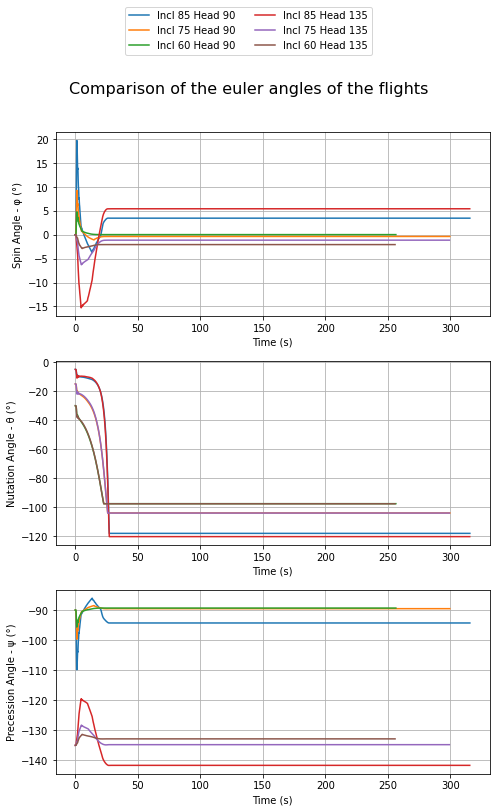

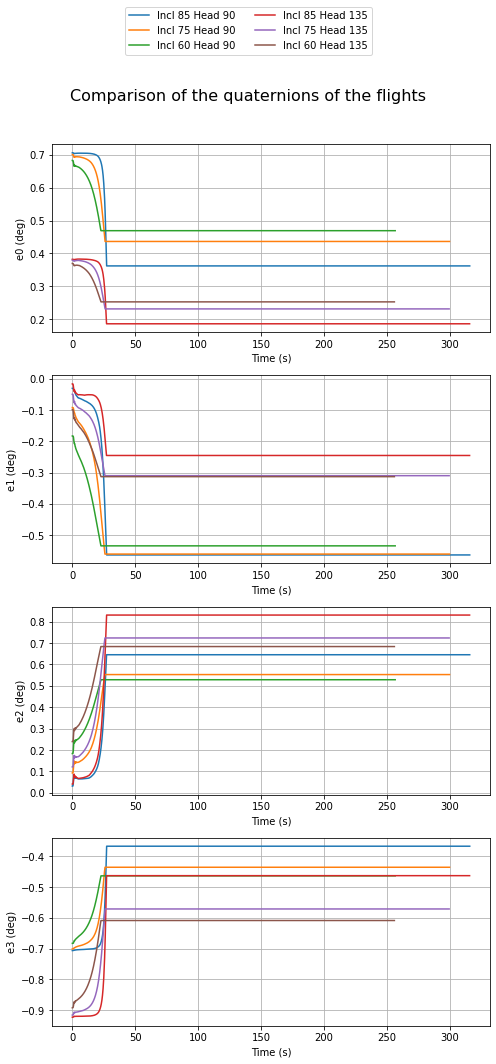

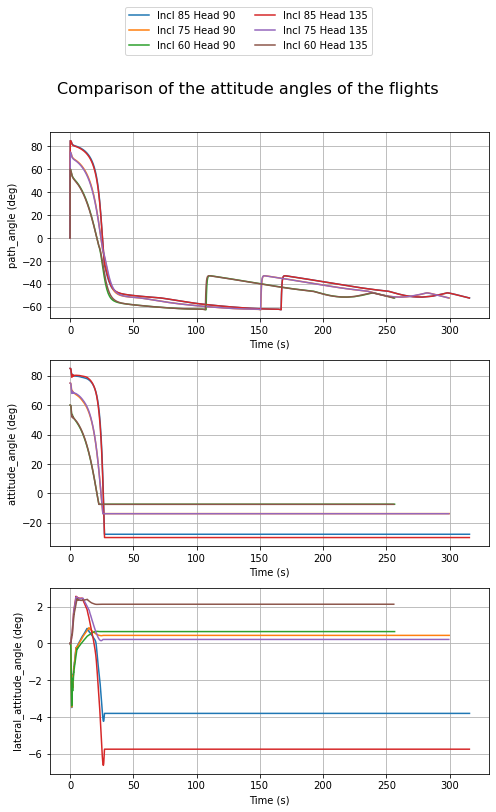

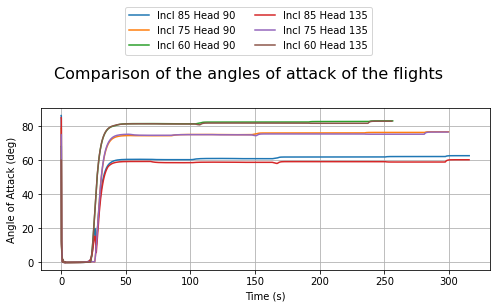

This method is not implemented yet


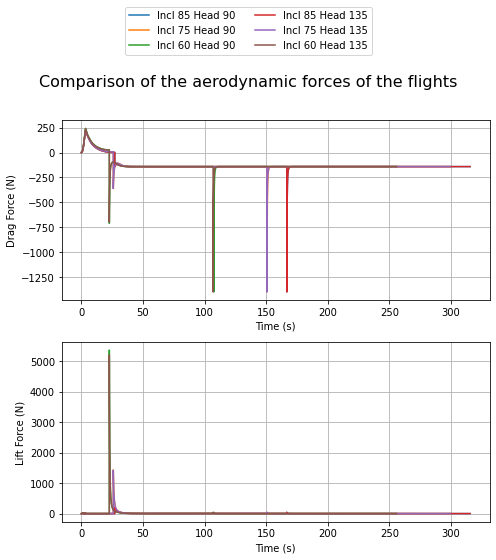

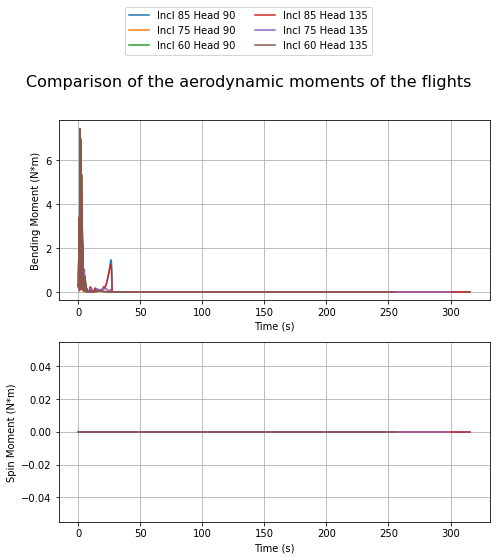

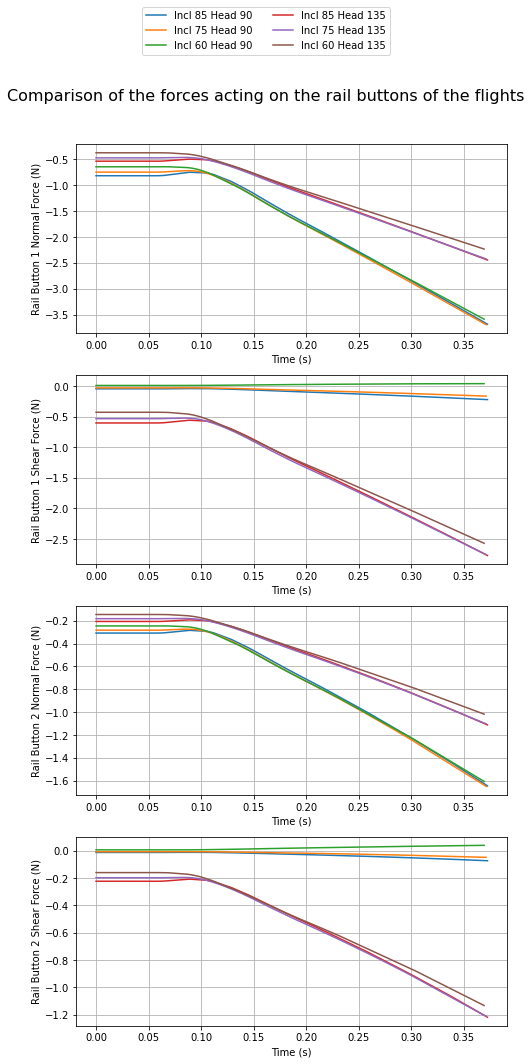

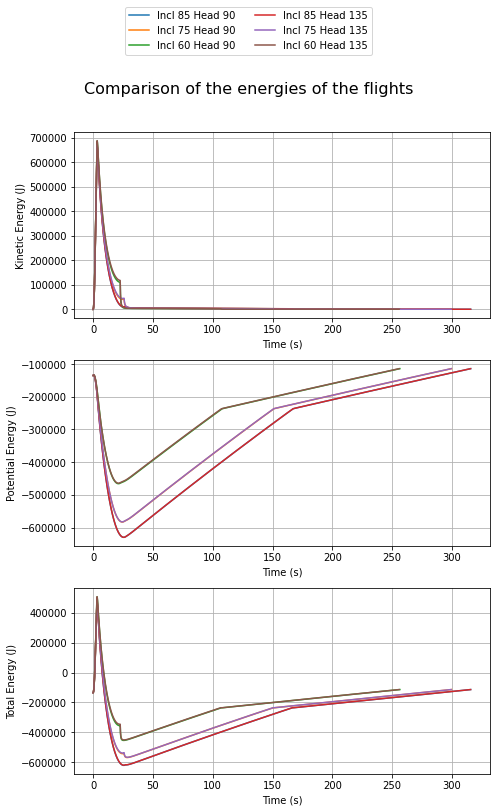

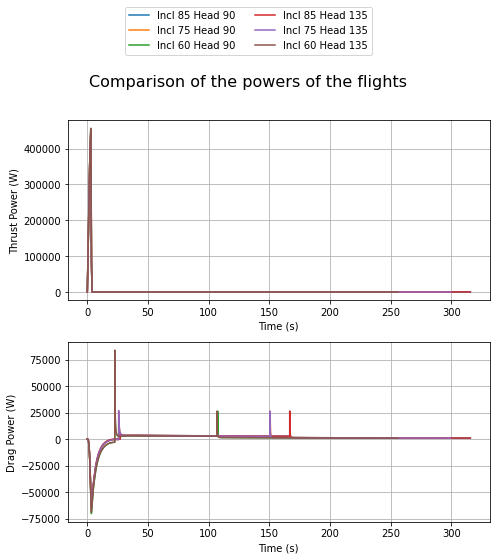

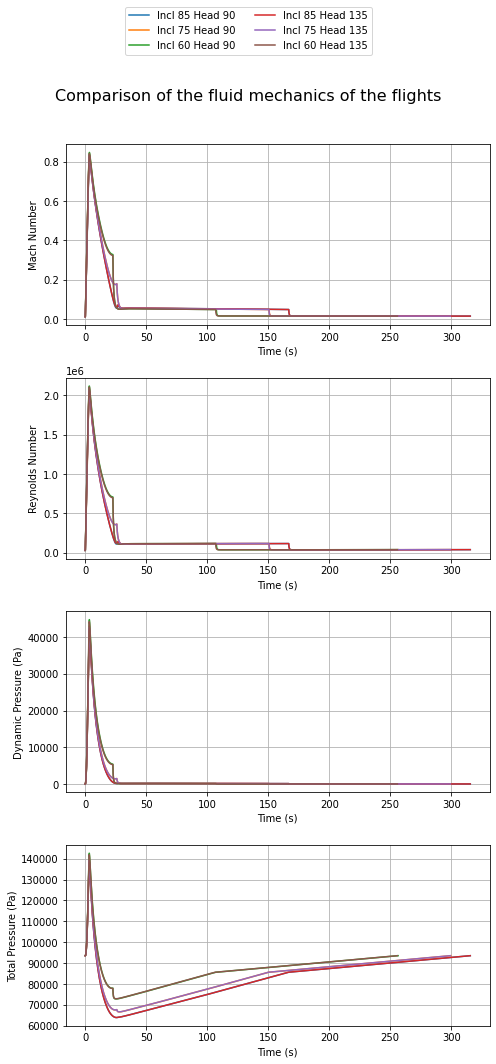

This method is not implemented yet


In [29]:
comparison.all()